In [10]:
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
from keras import backend as k
from keras.utils import np_utils

In [12]:
data = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = data.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

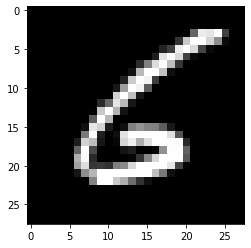

In [15]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i],cmap="gray")

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# X_train = X_train[:, np.newaxis, :, :]
# X_test = X_test[:, np.newaxis, :, :]
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
input_shape = (28, 28,1)
batch_size =128
epochs =10

In [19]:
model = Sequential()


model.add(Convolution2D(filters = 20,kernel_size = (5, 5),padding = "same",input_shape = (28, 28, 1)))
model.add(Activation(activation = "relu"))


model.add(MaxPooling2D(pool_size = (2, 2),strides =  (2, 2)))


model.add(Convolution2D(filters = 50,kernel_size = (5, 5),padding = "same"))
model.add(Activation(activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2)))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation(activation = "relu"))


model.add(Dense(10))
model.add(Activation("softmax"))


In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr = 0.01),metrics = ["accuracy"])

In [21]:
model.fit(X_train, y_train, batch_size = 128, epochs = 20,verbose = 1)


Epoch 1/20
469/469 [==============================] - 57s 120ms/step - loss: 0.9156 - accuracy: 0.7528
Epoch 2/20
469/469 [==============================] - 58s 124ms/step - loss: 0.2577 - accuracy: 0.9237
Epoch 3/20
469/469 [==============================] - 55s 117ms/step - loss: 0.1818 - accuracy: 0.9469
Epoch 4/20
469/469 [==============================] - 55s 117ms/step - loss: 0.1423 - accuracy: 0.9580
Epoch 5/20
469/469 [==============================] - 55s 117ms/step - loss: 0.1173 - accuracy: 0.9653
Epoch 6/20
469/469 [==============================] - 55s 116ms/step - loss: 0.1015 - accuracy: 0.9692
Epoch 7/20
469/469 [==============================] - 55s 118ms/step - loss: 0.0886 - accuracy: 0.9738
Epoch 8/20
469/469 [==============================] - 55s 117ms/step - loss: 0.0794 - accuracy: 0.9765
Epoch 9/20
469/469 [==============================] - 56s 119ms/step - loss: 0.0725 - accuracy: 0.9784
Epoch 10/20
469/469 [==============================] - 61s 131ms/step - l

In [22]:
(loss, accuracy) = model.evaluate(X_test, y_test,batch_size = 128, verbose = 1)

79/79 [==============================] - 3s 35ms/step - loss: 0.0419 - accuracy: 0.9872


In [23]:
print(accuracy)

0.9872000217437744


In [ ]:
#We have obtained 98.72% accuracy on the mnist dataset.
#The same model only gave 55.24% accuracy on the cifar10 dataset.

In [24]:
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [25]:
data_aug = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
data_aug.fit(X_train)

In [26]:
model.fit_generator(data_aug.flow(X_train, y_train,batch_size=batch_size),steps_per_epoch=391,
                        epochs=epochs,validation_data=(X_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
391/391 [==============================] - 53s 135ms/step - loss: 0.6208 - accuracy: 0.8106 - val_loss: 0.1801 - val_accuracy: 0.9420
Epoch 2/10
391/391 [==============================] - 52s 132ms/step - loss: 0.3485 - accuracy: 0.8891 - val_loss: 0.1481 - val_accuracy: 0.9538
Epoch 3/10
391/391 [==============================] - 53s 135ms/step - loss: 0.2896 - accuracy: 0.9087 - val_loss: 0.1246 - val_accuracy: 0.9608
Epoch 4/10
391/391 [==============================] - 52s 134ms/step - loss: 0.2584 - accuracy: 0.9192 - val_loss: 0.1328 - val_accuracy: 0.9577
Epoch 5/10
391/391 [==============================] - 52s 134ms/step - loss: 0.2291 - accuracy: 0.9281 - val_loss: 0.1218 - val_accuracy: 0.9607
Epoch 6/10
391/391 [==============================] - 52s 134ms/step - loss: 0.2141 - accuracy: 0.9330 - val_loss: 0.1050 - val_accuracy: 0.9654
Epoch 7/10
391/391 [==============================] - 

In [ ]:
#after augmenting after flipping the accuracy decreased to 97.11%

In [27]:
data_aug2 = ImageDataGenerator(featurewise_center=False,  samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


data_aug2.fit(X_train)

In [30]:
model.fit_generator(data_aug2.flow(X_train, y_train,batch_size=batch_size),steps_per_epoch=391,
                        epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 53s 136ms/step - loss: 0.1110 - accuracy: 0.9654 - val_loss: 0.0424 - val_accuracy: 0.9858
Epoch 2/10
391/391 [==============================] - 52s 134ms/step - loss: 0.0973 - accuracy: 0.9698 - val_loss: 0.0424 - val_accuracy: 0.9855
Epoch 3/10
391/391 [==============================] - 53s 134ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0386 - val_accuracy: 0.9879
Epoch 4/10
391/391 [==============================] - 53s 136ms/step - loss: 0.0820 - accuracy: 0.9745 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 5/10
391/391 [==============================] - 53s 135ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0368 - val_accuracy: 0.9873
Epoch 6/10
391/391 [==============================] - 53s 136ms/step - loss: 0.0745 - accuracy: 0.9772 - val_loss: 0.0317 - val_accuracy: 0.9881
Epoch 7/10
391/391 [==============================] - 53s 135ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.0314 - val_ac

In [ ]:
#but after further data augmentation the accuracy increased to 98.94%